# Отток клиентов банка

## Материалы

Презентация (https://disk.yandex.ru/i/roHUy0AnkhGY0w)

Дашборд (https://public.tableau.com/views/_16573264645050/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link)


# Описание данных

Датасет содержит данные о клиентах регионального банка. Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.


## Загрузка данных

In [1]:
import pandas as pd
pd.options.display.max_colwidth
pd.options.display.max_colwidth = 300
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
from statistics import mean 
pd.set_option('display.float_format', '{:,.3f}'.format)
import plotly.express as px 
from plotly import graph_objects as go
import seaborn as sns

In [2]:
def pre(df):
    df.columns = [x.lower().replace(' ', '_') for x in df.columns] #привожу названия столбцов к хоршему стилю
    display(df.head())
    display(df.info())
    display(df.describe())
    dup = df.duplicated().sum()
    print('Количество полных дубликатов:', dup)
    return  

In [3]:
df = pd.read_csv('')
df.head()

userid  score       City Gender  Age  Objects     Balance  Products  \
0  15677338    619  Ярославль      Ж   42        2         NaN         1   
1  15690047    608    Рыбинск      Ж   41        1  83,807.860         1   
2  15662040    502  Ярославль      Ж   42        8 159,660.800         3   
3  15744090    699  Ярославль      Ж   39        1         NaN         2   
4  15780624    850    Рыбинск      Ж   43        2 125,510.820         1   

   CreditCard  Loyalty  estimated_salary  Churn  
0           1        1       101,348.880      1  
1           0        1       112,542.580      0  
2           1        0       113,931.570      1  
3           0        0        93,826.630      0  
4           1        1        79,084.100      0

## Предобработка данных

In [4]:
pre(df)

userid  score       city gender  age  objects     balance  products  \
0  15677338    619  Ярославль      Ж   42        2         NaN         1   
1  15690047    608    Рыбинск      Ж   41        1  83,807.860         1   
2  15662040    502  Ярославль      Ж   42        8 159,660.800         3   
3  15744090    699  Ярославль      Ж   39        1         NaN         2   
4  15780624    850    Рыбинск      Ж   43        2 125,510.820         1   

   creditcard  loyalty  estimated_salary  churn  
0           1        1       101,348.880      1  
1           0        1       112,542.580      0  
2           1        0       113,931.570      1  
3           0        0        93,826.630      0  
4           1        1        79,084.100      0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   city              10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   objects           10000 non-null  int64  
 6   balance           6383 non-null   float64
 7   products          10000 non-null  int64  
 8   creditcard        10000 non-null  int64  
 9   loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

userid      score        age    objects     balance   products  \
count     10,000.000 10,000.000 10,000.000 10,000.000   6,383.000 10,000.000   
mean  15,733,676.569    650.529     38.922      5.013 119,827.494      1.530   
std       71,936.186     96.653     10.488      2.892  30,095.056      0.582   
min   15,608,437.000    350.000     18.000      0.000   3,768.690      1.000   
25%   15,671,264.250    584.000     32.000      3.000 100,181.975      1.000   
50%   15,733,474.000    652.000     37.000      5.000 119,839.690      1.000   
75%   15,795,969.750    718.000     44.000      7.000 139,512.290      2.000   
max   15,858,426.000    850.000     92.000     10.000 250,898.090      4.000   

       creditcard    loyalty  estimated_salary      churn  
count  10,000.000 10,000.000        10,000.000 10,000.000  
mean        0.706      0.515       100,090.240      0.204  
std         0.456      0.500        57,510.493      0.403  
min         0.000      0.000            11.580      0.000  
25%         0.000      0.000        51,002.110      0.000  
50%         1.000      1.000       100,193.915      0.000  
75%         1.000      1.000       149,388.247      0.000  
max         1.000      1.000       199,992.480      1.000

Количество полных дубликатов: 0


In [5]:
#два столбца придется переименовать вручную 
df.columns = df.columns.str.replace('creditcard', 'credit_card')
df.columns = df.columns.str.replace('userid', 'user_id')
df.head()

user_id  score       city gender  age  objects     balance  products  \
0  15677338    619  Ярославль      Ж   42        2         NaN         1   
1  15690047    608    Рыбинск      Ж   41        1  83,807.860         1   
2  15662040    502  Ярославль      Ж   42        8 159,660.800         3   
3  15744090    699  Ярославль      Ж   39        1         NaN         2   
4  15780624    850    Рыбинск      Ж   43        2 125,510.820         1   

   credit_card  loyalty  estimated_salary  churn  
0            1        1       101,348.880      1  
1            0        1       112,542.580      0  
2            1        0       113,931.570      1  
3            0        0        93,826.630      0  
4            1        1        79,084.100      0

Типы данных менять не нужно.
Дубликатов нет. 

Есть пропуски в колонке balance. Для изучения причин появления пропусков, сгруппирую данные по столбцам и сравню количество пользователей в группах и количество данных о балансе. 

In [6]:
for elem in df.columns:
    d = df.groupby(elem).agg({'user_id' : 'count', 'balance' : 'count'})
    display(d)

user_id  balance
user_id                   
15608437        1        1
15608442        1        0
15608450        1        1
15608515        1        1
15608532        1        1
...           ...      ...
15858364        1        1
15858381        1        1
15858392        1        1
15858396        1        1
15858426        1        1

[10000 rows x 2 columns]

user_id  balance
score                  
350          5        3
351          1        1
358          1        1
359          1        1
363          1        1
...        ...      ...
846          5        2
847          6        5
848          5        5
849          8        6
850        233      155

[460 rows x 2 columns]

user_id  balance
city                            
Ростов Великий     2509     2509
Рыбинск            2477     1278
Ярославль          5014     2596

user_id  balance
gender                  
Ж          4543     2889
М          5457     3494

user_id  balance
age                  
18        22       14
19        27       16
20        40       23
21        53       33
22        84       48
..       ...      ...
83         1        1
84         2        2
85         1        0
88         1        0
92         2        2

[70 rows x 2 columns]

user_id  balance
objects                  
0            413      276
1           1035      686
2           1048      666
3           1009      657
4            989      620
5           1012      638
6            967      600
7           1028      642
8           1025      662
9            984      624
10           490      312

user_id  balance
balance                      
3,768.690          1        1
12,459.190         1        1
14,262.800         1        1
16,893.590         1        1
23,503.310         1        1
...              ...      ...
216,109.880        1        1
221,532.800        1        1
222,267.630        1        1
238,387.560        1        1
250,898.090        1        1

[6381 rows x 2 columns]

user_id  balance
products                  
1            5084     4179
2            4590     1990
3             266      168
4              60       46

user_id  balance
credit_card                  
0               2945     1920
1               7055     4463

user_id  balance
loyalty                  
0           4849     3105
1           5151     3278

user_id  balance
estimated_salary                  
11.580                  1        1
90.070                  1        0
91.750                  1        1
96.270                  1        0
106.670                 1        0
...                   ...      ...
199,909.320             1        0
199,929.170             1        1
199,953.330             1        1
199,970.740             1        1
199,992.480             1        0

[9999 rows x 2 columns]

user_id  balance
churn                  
0         7963     4846
1         2037     1537

Можно отметить, что в Ростове есть данные о всех пользователях, а в других городах около 50% пропусков. 

Пропуски, вероятно, появились в результате ошибки при выгрузке данных из городов Рыбинск и Ярославль. Так как баланс клиента банк знает в любом случае. 

Хочу заполнить пропуски медианой с группировкой по другим столбцам, у которых есть взаимосвязь с балансом. Для этого необходимо по коэффициентам корреляции посмотреть, какие столбцы использовать для группировки и вычисления медианы.

Чтобы построить графики и матрицу корреляции добавлю столбец 'city_id' и 'gender_id'.

In [7]:
df['city'].unique()

array(['Ярославль', 'Рыбинск', 'Ростов Великий'], dtype=object)

In [8]:
df['city_id'] = df['city'].map({'Ярославль': 0, 'Рыбинск': 1, 'Ростов Великий': 2 } )
df['gender_id'] = df['gender'].map({'Ж': 0, 'М': 1})

Чтобы определить принцип заполнения пропущенных значений, построю матрицу корреляций по данным без пропусков. 

In [9]:
df_clear = df.dropna()

In [10]:
cm = df_clear.corr()
display(cm)

user_id  score    age  objects  balance  products  \
user_id             1.000  0.013 -0.006   -0.029   -0.009     0.018   
score               0.013  1.000 -0.009    0.003   -0.005     0.009   
age                -0.006 -0.009  1.000    0.009   -0.013     0.008   
objects            -0.029  0.003  0.009    1.000    0.006     0.006   
balance            -0.009 -0.005 -0.013    0.006    1.000    -0.001   
products            0.018  0.009  0.008    0.006   -0.001     1.000   
credit_card        -0.021 -0.015 -0.020    0.026    0.007     0.003   
loyalty             0.002  0.031  0.063   -0.042   -0.020    -0.006   
estimated_salary    0.016  0.001 -0.009    0.013   -0.002     0.026   
churn              -0.007 -0.031  0.302   -0.001    0.017     0.078   
city_id             0.005  0.003  0.050    0.009   -0.003     0.171   
gender_id           0.005 -0.003 -0.022    0.015    0.026    -0.036   

                  credit_card  loyalty  estimated_salary  churn  city_id  \
user_id                -0.021    0.002             0.016 -0.007    0.005   
score                  -0.015    0.031             0.001 -0.031    0.003   
age                    -0.020    0.063            -0.009  0.302    0.050   
objects                 0.026   -0.042             0.013 -0.001    0.009   
balance                 0.007   -0.020            -0.002  0.017   -0.003   
products                0.003   -0.006             0.026  0.078    0.171   
credit_card             1.000   -0.018            -0.004 -0.002    0.019   
loyalty                -0.018    1.000            -0.014 -0.172   -0.013   
estimated_salary       -0.004   -0.014             1.000  0.006    0.004   
churn                  -0.002   -0.172             0.006  1.000    0.148   
city_id                 0.019   -0.013             0.004  0.148    1.000   
gender_id               0.008    0.031            -0.008 -0.113   -0.028   

                  gender_id  
user_id               0.005  
score                -0.003  
age                  -0.022  
objects               0.015  
balance               0.026  
products             -0.036  
credit_card           0.008  
loyalty               0.031  
estimated_salary     -0.008  
churn                -0.113  
city_id              -0.028  
gender_id             1.000

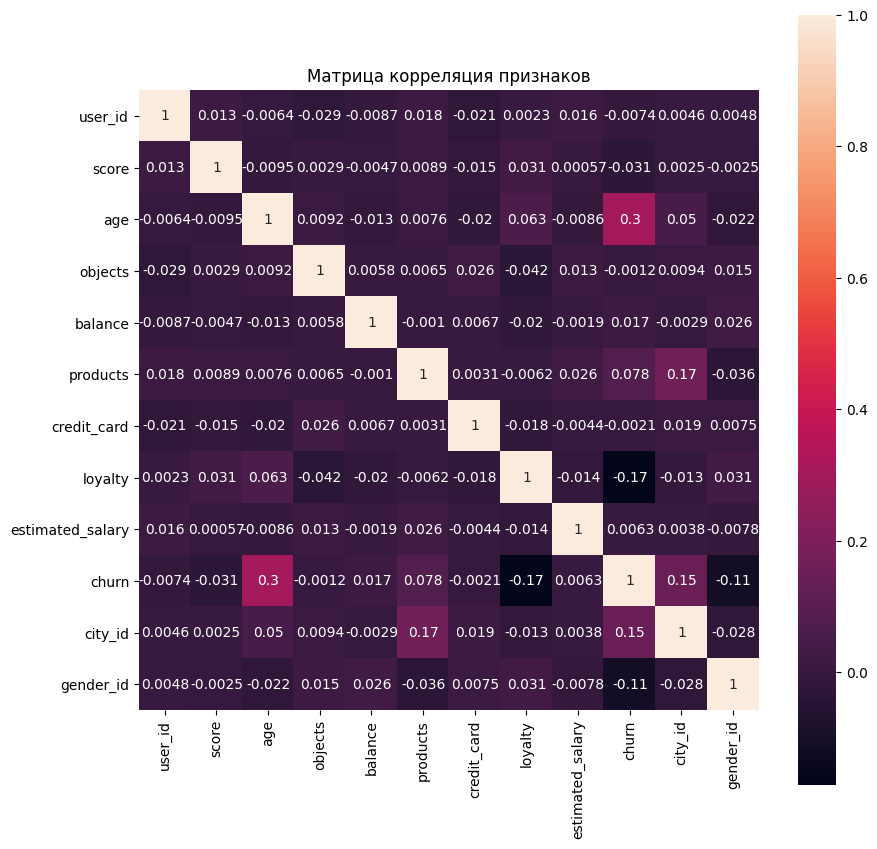

In [11]:
#по матрице корреляций построю тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, square=True)
plt.title('Матрица корреляция признаков')
plt.show()

In [12]:
cm['balance'].abs().sort_values(ascending = False)

balance            1.000
gender_id          0.026
loyalty            0.020
churn              0.017
age                0.013
user_id            0.009
credit_card        0.007
objects            0.006
score              0.005
city_id            0.003
estimated_salary   0.002
products           0.001
Name: balance, dtype: float64

Из таблицы выше, мы видим, что больше всего с балансом коррелирует пол клиента, активность и уход (возможно, от нас уходят клиенты с большим балансом, на это следует обратить внимание). 

На основании полученных коэффициентов заменю пропуски медианой с группировкой по полу клиента и активности. 

In [13]:
for elem in df.columns:
    d = df.groupby(elem).agg({'user_id' : 'count', 'balance' : 'count'})
    display(d)

user_id  balance
user_id                   
15608437        1        1
15608442        1        0
15608450        1        1
15608515        1        1
15608532        1        1
...           ...      ...
15858364        1        1
15858381        1        1
15858392        1        1
15858396        1        1
15858426        1        1

[10000 rows x 2 columns]

user_id  balance
score                  
350          5        3
351          1        1
358          1        1
359          1        1
363          1        1
...        ...      ...
846          5        2
847          6        5
848          5        5
849          8        6
850        233      155

[460 rows x 2 columns]

user_id  balance
city                            
Ростов Великий     2509     2509
Рыбинск            2477     1278
Ярославль          5014     2596

user_id  balance
gender                  
Ж          4543     2889
М          5457     3494

user_id  balance
age                  
18        22       14
19        27       16
20        40       23
21        53       33
22        84       48
..       ...      ...
83         1        1
84         2        2
85         1        0
88         1        0
92         2        2

[70 rows x 2 columns]

user_id  balance
objects                  
0            413      276
1           1035      686
2           1048      666
3           1009      657
4            989      620
5           1012      638
6            967      600
7           1028      642
8           1025      662
9            984      624
10           490      312

user_id  balance
balance                      
3,768.690          1        1
12,459.190         1        1
14,262.800         1        1
16,893.590         1        1
23,503.310         1        1
...              ...      ...
216,109.880        1        1
221,532.800        1        1
222,267.630        1        1
238,387.560        1        1
250,898.090        1        1

[6381 rows x 2 columns]

user_id  balance
products                  
1            5084     4179
2            4590     1990
3             266      168
4              60       46

user_id  balance
credit_card                  
0               2945     1920
1               7055     4463

user_id  balance
loyalty                  
0           4849     3105
1           5151     3278

user_id  balance
estimated_salary                  
11.580                  1        1
90.070                  1        0
91.750                  1        1
96.270                  1        0
106.670                 1        0
...                   ...      ...
199,909.320             1        0
199,929.170             1        1
199,953.330             1        1
199,970.740             1        1
199,992.480             1        0

[9999 rows x 2 columns]

user_id  balance
churn                  
0         7963     4846
1         2037     1537

user_id  balance
city_id                  
0           5014     2596
1           2477     1278
2           2509     2509

user_id  balance
gender_id                  
0             4543     2889
1             5457     3494

In [14]:
print(df.isna().sum())

def fill_median(df):
    medians = df.groupby(['gender_id','loyalty']).median()['balance']
    for elem in medians.index:
        change_ix = (df['gender_id'] == elem[0]) & (df['loyalty'] == elem[1]) & (df['balance'].isna())
        df.loc[change_ix, 'balance'] = medians[elem]    
    return df.isna().sum()

print(fill_median(df))

user_id                0
score                  0
city                   0
gender                 0
age                    0
objects                0
balance             3617
products               0
credit_card            0
loyalty                0
estimated_salary       0
churn                  0
city_id                0
gender_id              0
dtype: int64
user_id             0
score               0
city                0
gender              0
age                 0
objects             0
balance             0
products            0
credit_card         0
loyalty             0
estimated_salary    0
churn               0
city_id             0
gender_id           0
dtype: int64


### Вывод

Проведена предподготовка данных. Переименованы столбцы по правилам "хорошего стиля". Пропуски в данных заменены медианами с группировкой по двум наиболее коррелирующим столбцам. Можно приступать к исследовательскому анализу данных. 

## Исследовательский анализ данных

### Портрет среднего клиента
Посмотрим на распределение признаков в датасете.

In [15]:
df.drop('user_id', axis=1, inplace=True)

In [16]:
display(df.describe())

score        age    objects     balance   products  credit_card  \
count 10,000.000 10,000.000 10,000.000  10,000.000 10,000.000   10,000.000   
mean     650.529     38.922      5.013 119,791.433      1.530        0.706   
std       96.653     10.488      2.892  24,049.347      0.582        0.456   
min      350.000     18.000      0.000   3,768.690      1.000        0.000   
25%      584.000     32.000      3.000 111,581.128      1.000        0.000   
50%      652.000     37.000      5.000 119,839.690      1.000        1.000   
75%      718.000     44.000      7.000 127,644.240      2.000        1.000   
max      850.000     92.000     10.000 250,898.090      4.000        1.000   

         loyalty  estimated_salary      churn    city_id  gender_id  
count 10,000.000        10,000.000 10,000.000 10,000.000 10,000.000  
mean       0.515       100,090.240      0.204      0.750      0.546  
std        0.500        57,510.493      0.403      0.830      0.498  
min        0.000            11.580      0.000      0.000      0.000  
25%        0.000        51,002.110      0.000      0.000      0.000  
50%        1.000       100,193.915      0.000      0.000      1.000  
75%        1.000       149,388.247      0.000      2.000      1.000  
max        1.000       199,992.480      1.000      2.000      1.000

Построим гистограммы

In [17]:
df.columns

Index(['score', 'city', 'gender', 'age', 'objects', 'balance', 'products',
       'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_id',
       'gender_id'],
      dtype='object')

In [18]:
col = ['score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_id', 'gender_id']

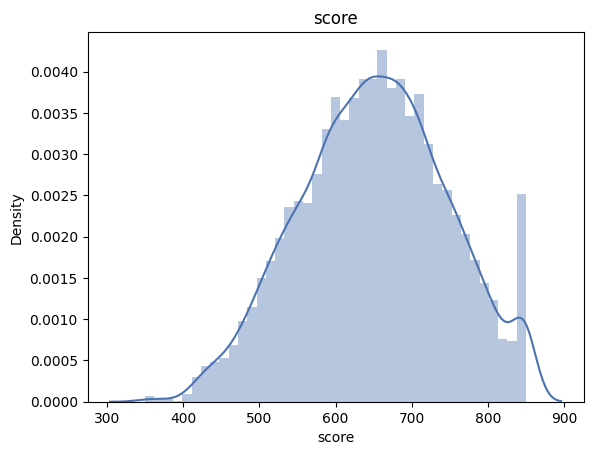

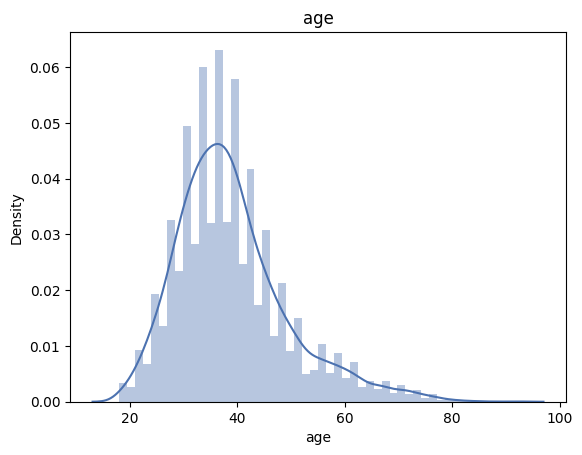

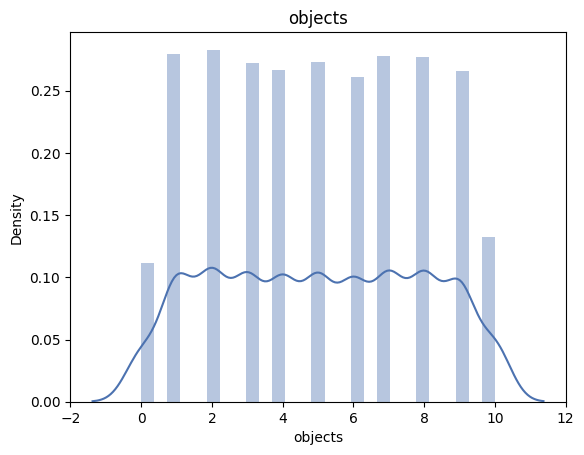

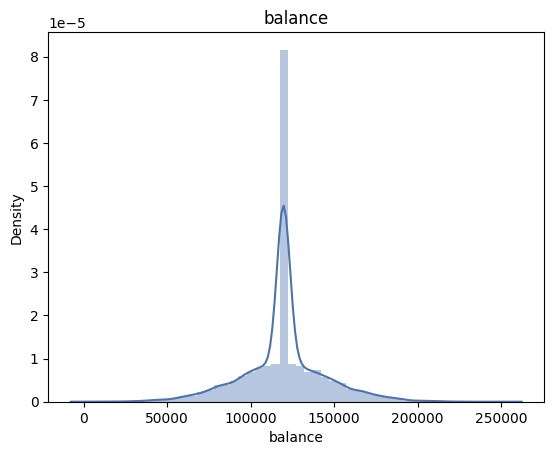

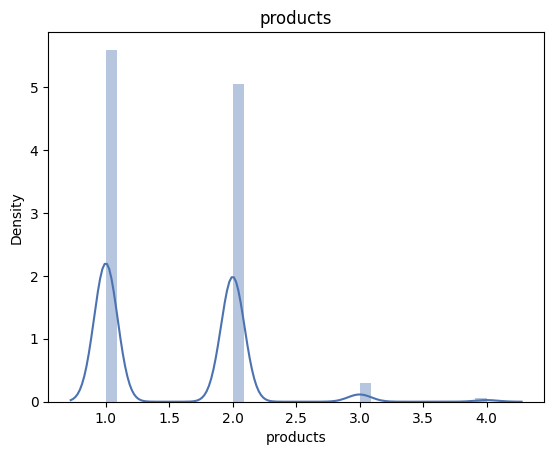

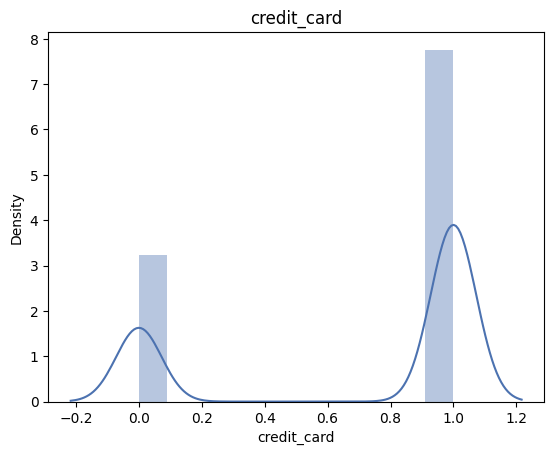

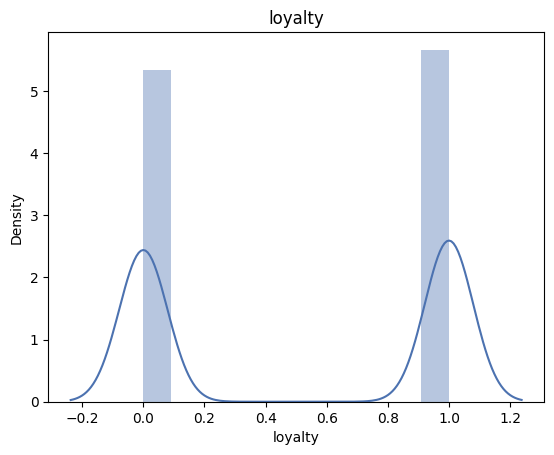

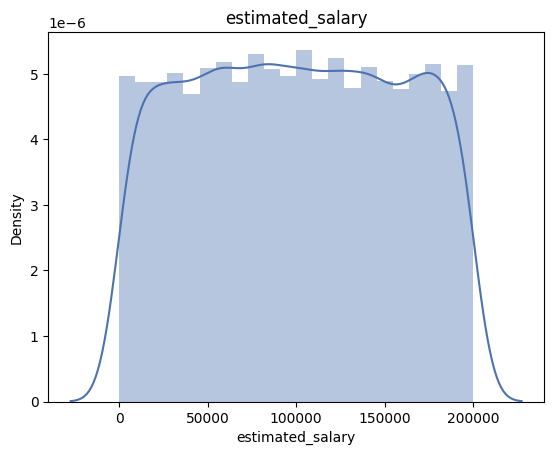

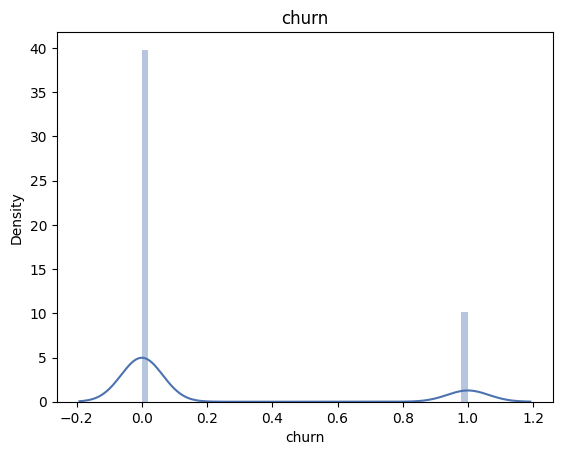

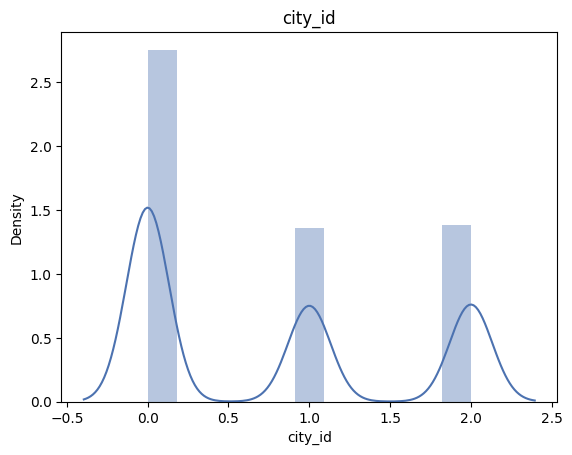

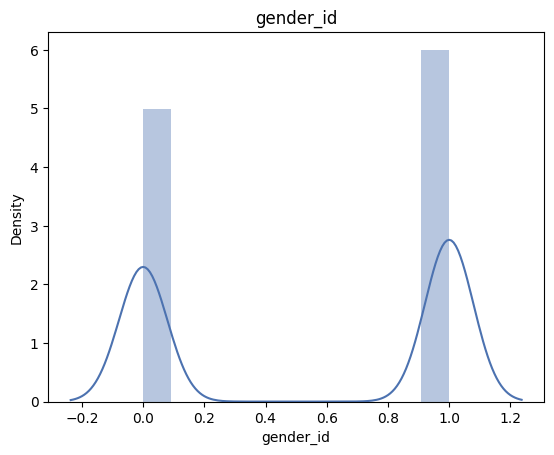

In [19]:
#построение гистограмм

plt.style.use('seaborn-deep')

for elem in col:
    sns.distplot(df[elem])
    plt.xlabel(elem)
    plt.title(elem)
    plt.show()

Посмотрим на средние значения признаков (портрет среднестатистического клиента).

1)Средний балл кредитного скоринга составляет 650 у.е.

2)Большинство клиентов из города Ярославль. 

3)По гендерному признаку клиенты делятся примерно поровну с небольшим перевесом мужчин. 

4)Средний возраст составляет 39 лет.

5)В среднем по 5 объектов недвижимости в собственности (довольно много), максимальное 10.

6)Средний балланс на счете 119,791.433 у.е.

7)У большинства по 1 продукту в пользовании. Максимальное - 4 продукта. 

8)Около 70% клиентов имеют кредитные карты. 

9)По активности клиенты делятся поровну.

10)И большинство и в среднем зарабатывают около 100 000 у.е.

11)Уходит 20,4% клиентов. Довольно неплохой показатель. 

###  Портреты ушедшего и оставшегося клиента

Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [20]:
df_group = df.groupby('churn').mean()
df_group.head()

score    age  objects     balance  products  credit_card  loyalty  \
churn                                                                       
0     651.853 37.408    5.033 119,619.717     1.544        0.707    0.555   
1     645.351 44.838    4.933 120,462.704     1.475        0.699    0.361   

       estimated_salary  city_id  gender_id  
churn                                        
0            99,738.392    0.685      0.573  
1           101,465.678    1.002      0.441

По распределению средних значений признаков в зависимости от того, ушел клиент или остался.

Почти не различаются - средние баллы кредитного скоринга, количество объектов в собственности, балланс средств, количество продуктов, наличие кредитной карты, заработная плата. 

Возраст различется, уходящие клиенты старше. 

Логично отличается активность клиентов - ушедшие менее активны. 

Женщины уходят чаще мужчин.

In [21]:
# создам 2 таблицы по признаку-целевой переменной
# кто ушел
out = df.query('churn == 1').reset_index(drop = True)
out.head()

score            city gender  age  objects     balance  products  \
0    619       Ярославль      Ж   42        2 119,035.350         1   
1    502       Ярославль      Ж   42        8 159,660.800         3   
2    645         Рыбинск      М   44        8 113,755.780         2   
3    376  Ростов Великий      Ж   29        4 115,046.740         4   
4    653  Ростов Великий      М   58        1 132,602.880         1   

   credit_card  loyalty  estimated_salary  churn  city_id  gender_id  
0            1        1       101,348.880      1        0          0  
1            1        0       113,931.570      1        0          0  
2            1        0       149,756.710      1        1          1  
3            1        0       119,346.880      1        2          0  
4            1        0         5,097.670      1        2          1

In [22]:
# кто остался
stay = df.query('churn == 0').reset_index(drop = True)
stay.head()

score       city gender  age  objects     balance  products  credit_card  \
0    608    Рыбинск      Ж   41        1  83,807.860         1            0   
1    699  Ярославль      Ж   39        1 118,757.725         2            0   
2    850    Рыбинск      Ж   43        2 125,510.820         1            1   
3    822  Ярославль      М   50        7 119,839.690         2            1   
4    501  Ярославль      М   44        4 142,051.070         2            0   

   loyalty  estimated_salary  churn  city_id  gender_id  
0        1       112,542.580      0        1          0  
1        0        93,826.630      0        0          0  
2        1        79,084.100      0        1          0  
3        1        10,062.800      0        0          1  
4        1        74,940.500      0        0          1

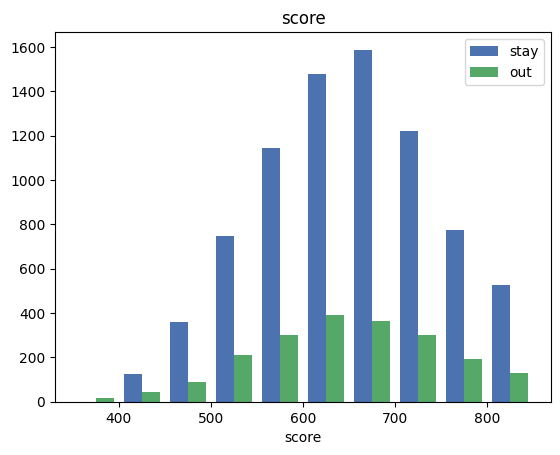

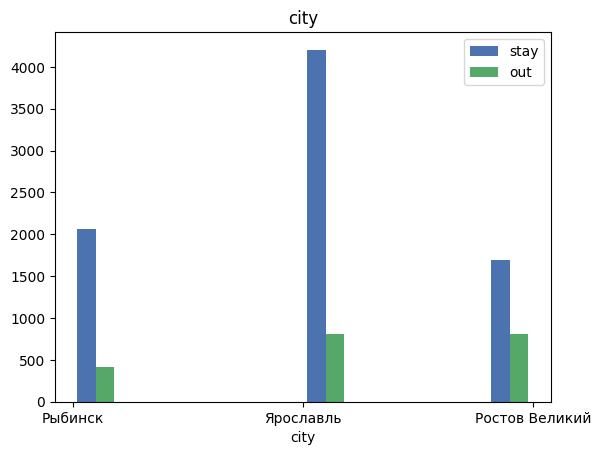

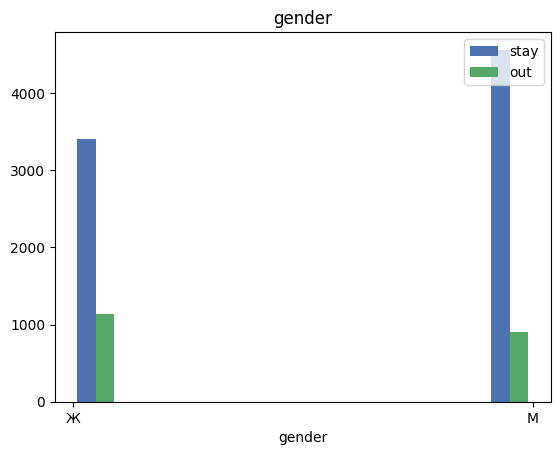

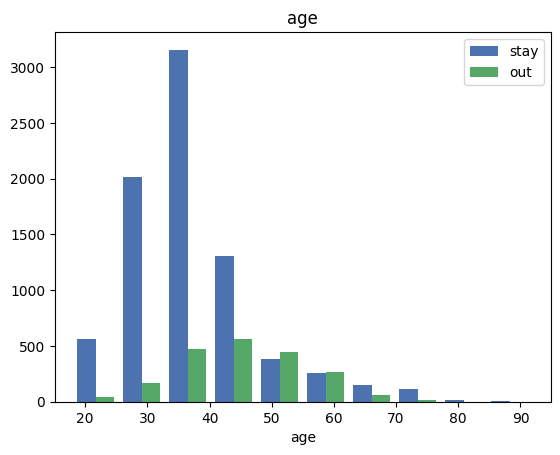

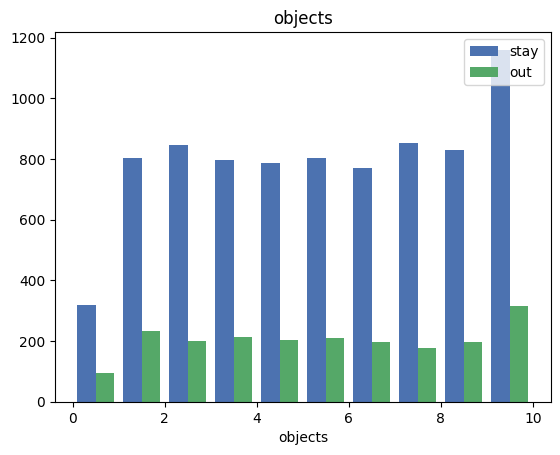

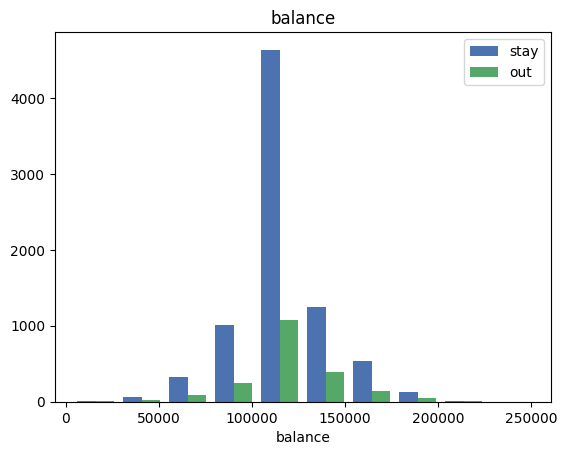

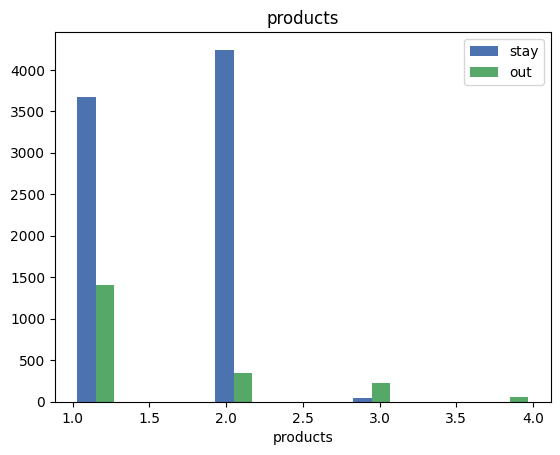

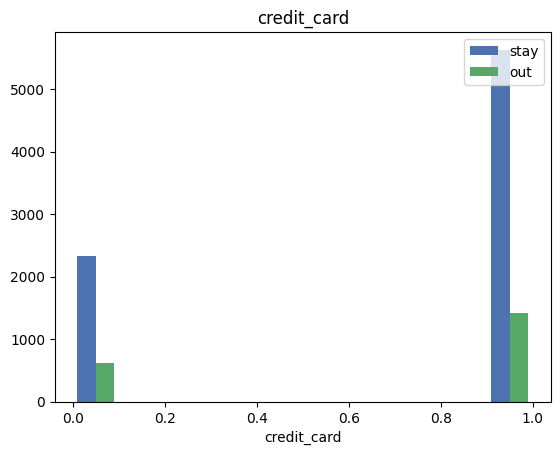

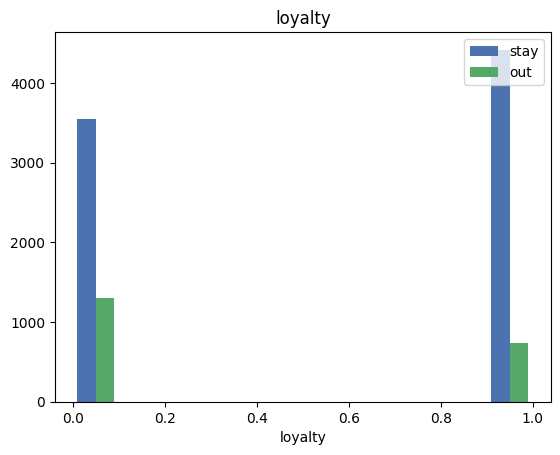

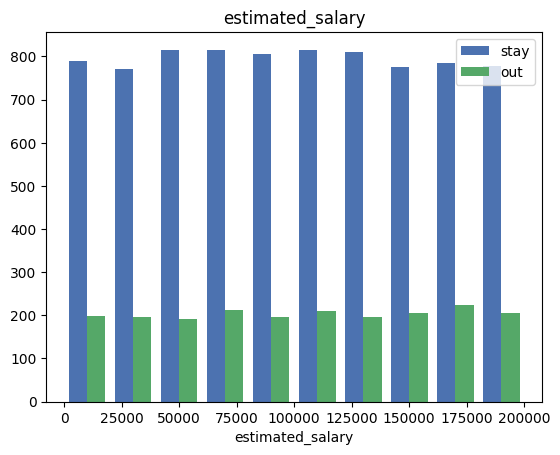

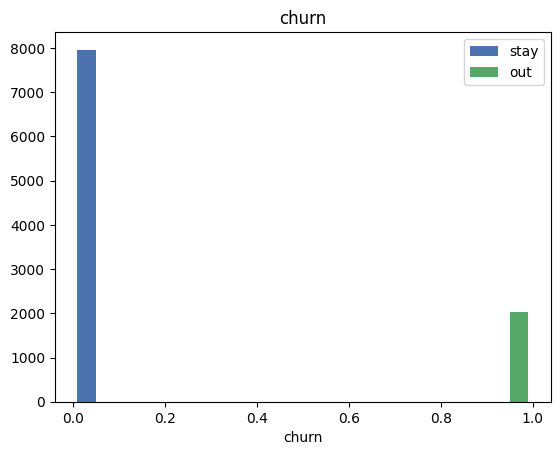

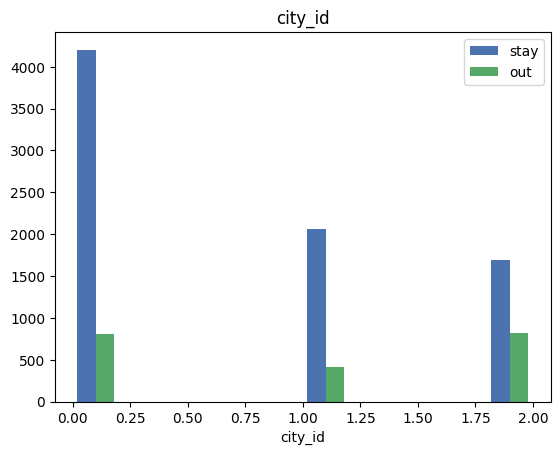

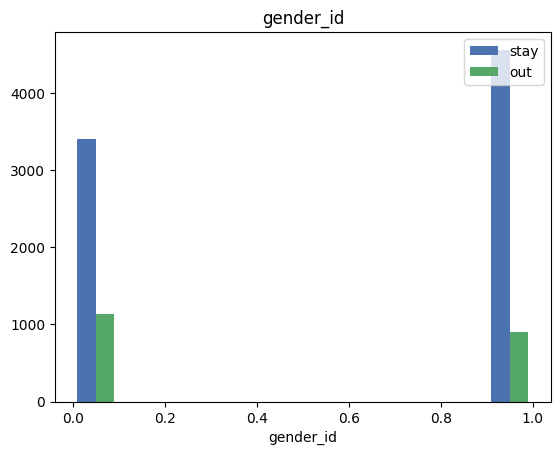

In [23]:
#построение гистограмм с распределением на ушедших и оставшихся

plt.style.use('seaborn-deep')
for elem in df.columns:
    plt.hist([stay[elem], out[elem]], label=['stay', 'out'])
    plt.legend(loc='upper right')
    plt.xlabel(elem)
    plt.title(elem)
    plt.show()

По средним значениям сформулирую примерный "портрет" ушедшего клиента:

Характерный возраст - около 45 лет, средние баллы кредитного скоринга - 645, 5 объектов в собственности, балланс около 120 000 у.е., использует 1-2 продукта, скорее всего есть кредитка, чаще всего не активный, заработная плата 101 000 у.е., более вероятно, что уйдет женщина. 

По средним значениям сформулирую примерный "портрет" оставшегося клиента:

Характерный возраст - около 37 лет, средние баллы кредитного скоринга - 651, 5 объектов в собственности, балланс около 120 000 у.е., использует 1-2 продукта, скорее всего есть кредитка, чаще всего активный, заработная плата 100 000 у.е., более вероятно, что останется мужчина.

На гистограмме распределения по городам заметно различное соотношение ушедших и оставшихся для разных городов. Изучим этот вопрос, посчитаем процент оттока по городам. 

In [24]:
df_city = df.groupby('city').agg({'churn' : 'mean'}).sort_values(by = 'churn', ascending = False).reset_index()
df_city['churn'] = df_city['churn'] *100

df_city

city  churn
0  Ростов Великий 32.443
1         Рыбинск 16.673
2       Ярославль 16.155

Из таблицы выше видно, что в Ростове Великом самый большой процент оттока - 32%, тогда как в Рыбинске и Ярославле он в 2 раза меньше - около 16%. Рекомендуется уделить внимание клиентам из Ростова Великого и их удержанию.

### Матрица корреляции признаков

In [25]:
cr = df.corr()
display(cr)

score    age  objects  balance  products  credit_card  \
score             1.000 -0.004    0.001   -0.004     0.012       -0.005   
age              -0.004  1.000   -0.010   -0.011    -0.031       -0.012   
objects           0.001 -0.010    1.000    0.005     0.013        0.023   
balance          -0.004 -0.011    0.005    1.000    -0.002        0.005   
products          0.012 -0.031    0.013   -0.002     1.000        0.003   
credit_card      -0.005 -0.012    0.023    0.005     0.003        1.000   
loyalty           0.026  0.085   -0.028   -0.020     0.010       -0.012   
estimated_salary -0.001 -0.007    0.008   -0.001     0.014       -0.010   
churn            -0.027  0.285   -0.014    0.014    -0.048       -0.007   
city_id           0.008  0.048    0.001   -0.002    -0.006        0.004   
gender_id        -0.003 -0.028    0.015    0.032    -0.022        0.006   

                  loyalty  estimated_salary  churn  city_id  gender_id  
score               0.026            -0.001 -0.027    0.008     -0.003  
age                 0.085            -0.007  0.285    0.048     -0.028  
objects            -0.028             0.008 -0.014    0.001      0.015  
balance            -0.020            -0.001  0.014   -0.002      0.032  
products            0.010             0.014 -0.048   -0.006     -0.022  
credit_card        -0.012            -0.010 -0.007    0.004      0.006  
loyalty             1.000            -0.011 -0.156   -0.013      0.023  
estimated_salary   -0.011             1.000  0.012    0.007     -0.008  
churn              -0.156             0.012  1.000    0.154     -0.107  
city_id            -0.013             0.007  0.154    1.000     -0.017  
gender_id           0.023            -0.008 -0.107   -0.017      1.000

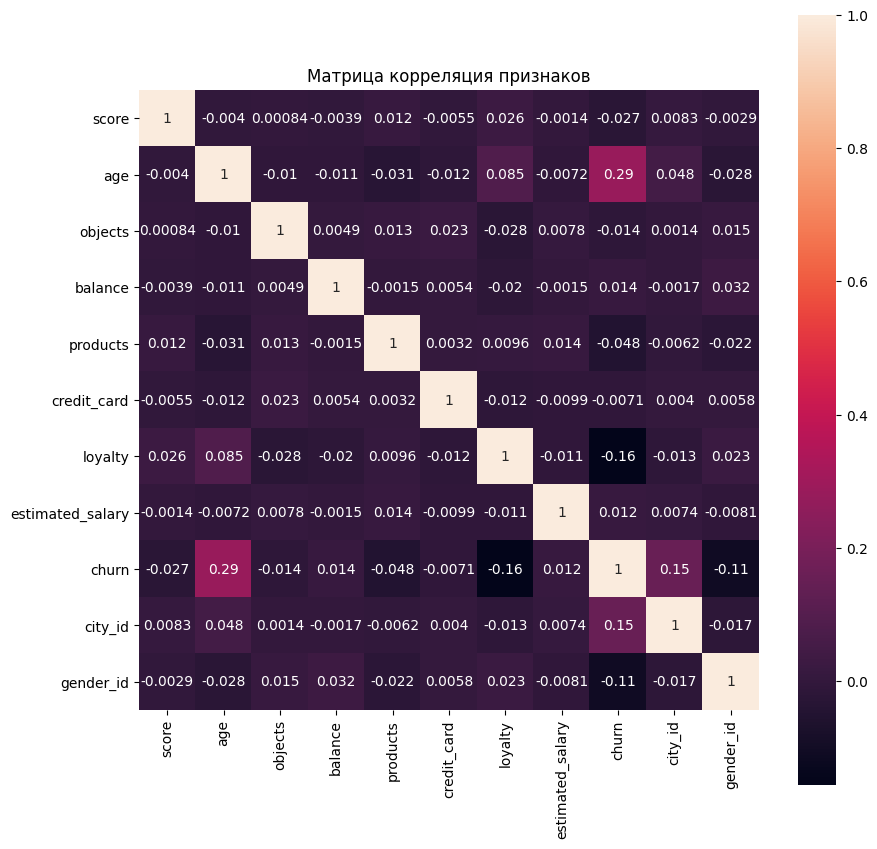

In [26]:
#по матрице корреляций построю тепловую карту
plt.figure(figsize=(10, 10))
sns.heatmap(cr, annot=True, square=True)
plt.title('Матрица корреляция признаков')
plt.show()

In [27]:
cr['churn'].abs().sort_values(ascending = False)

churn              1.000
age                0.285
loyalty            0.156
city_id            0.154
gender_id          0.107
products           0.048
score              0.027
balance            0.014
objects            0.014
estimated_salary   0.012
credit_card        0.007
Name: churn, dtype: float64

Больше всего с уходом коррелируют возраст, активность и город. 

### Сегментация 

Разделю пользователей на группы по возрасту и посмотрю распределение признаков в группах. 

Возрастные рамки групп:
от 18 до 21 года - юные;
от 21 до 35 лет - молодые;
от 35 до 65 лет - взрослые;
от 65 лет - пожилые. 

In [28]:
# добавлю столбец с группой в таблицу 

def age_category(df):
    if 18 <= df['age'] <= 21:
        return 'teen'
    if 21 < df['age'] <= 35:
        return 'young'
    if 35 < df['age'] <= 65:
        return 'adults'
    return 'old'

df['age_cat'] = df.apply(age_category, axis=1)

In [29]:
#создам отдельные таблицы для групп

teen = df.query('age_cat == "teen"')
young = df.query('age_cat == "young"')
adults = df.query('age_cat == "adults"')
old = df.query('age_cat == "old"')

In [30]:
#посмотрим распределения признаков по группам
groups = [teen, young, adults, old]
for group in groups:
    display(group.describe())

score     age  objects     balance  products  credit_card  loyalty  \
count 142.000 142.000  142.000     142.000   142.000      142.000  142.000   
mean  661.880  19.873    4.923 122,704.786     1.549        0.704    0.556   
std    82.229   1.084    2.999  24,674.569     0.513        0.458    0.499   
min   449.000  18.000    0.000  35,741.690     1.000        0.000    0.000   
25%   608.500  19.000    2.000 117,706.574     1.000        0.000    0.000   
50%   660.500  20.000    5.000 119,839.690     2.000        1.000    1.000   
75%   721.500  21.000    8.000 128,686.560     2.000        1.000    1.000   
max   850.000  21.000   10.000 210,433.080     3.000        1.000    1.000   

       estimated_salary   churn  city_id  gender_id  
count           142.000 142.000  142.000    142.000  
mean         97,561.540   0.056    0.697      0.585  
std          61,241.518   0.231    0.808      0.495  
min           1,408.680   0.000    0.000      0.000  
25%          40,662.225   0.000    0.000      0.000  
50%         104,274.965   0.000    0.000      1.000  
75%         153,335.612   0.000    1.000      1.000  
max         197,582.790   1.000    2.000      1.000

score       age   objects     balance  products  credit_card  \
count 4,011.000 4,011.000 4,011.000   4,011.000 4,011.000    4,011.000   
mean    650.194    30.368     5.054 119,787.072     1.541        0.715   
std      97.624     3.526     2.862  23,774.721     0.538        0.451   
min     363.000    22.000     0.000  14,262.800     1.000        0.000   
25%     581.000    28.000     3.000 112,029.740     1.000        0.000   
50%     652.000    31.000     5.000 119,839.690     2.000        1.000   
75%     718.000    33.000     8.000 127,138.465     2.000        1.000   
max     850.000    35.000    10.000 214,346.960     4.000        1.000   

        loyalty  estimated_salary     churn   city_id  gender_id  
count 4,011.000         4,011.000 4,011.000 4,011.000  4,011.000  
mean      0.510       100,169.648     0.085     0.701      0.558  
std       0.500        58,136.592     0.278     0.816      0.497  
min       0.000            90.070     0.000     0.000      0.000  
25%       0.000        49,794.335     0.000     0.000      0.000  
50%       1.000       101,192.080     0.000     0.000      1.000  
75%       1.000       150,031.990     0.000     1.000      1.000  
max       1.000       199,953.330     1.000     2.000      1.000

score       age   objects     balance  products  credit_card  \
count 5,583.000 5,583.000 5,583.000   5,583.000 5,583.000    5,583.000   
mean    649.836    44.023     4.982 119,765.296     1.522        0.698   
std      96.247     7.054     2.910  24,237.600     0.613        0.459   
min     350.000    36.000     0.000   3,768.690     1.000        0.000   
25%     584.000    38.000     2.000 111,134.975     1.000        0.000   
50%     651.000    42.000     5.000 119,839.690     1.000        1.000   
75%     717.000    48.000     7.000 128,177.065     2.000        1.000   
max     850.000    65.000    10.000 250,898.090     4.000        1.000   

        loyalty  estimated_salary     churn   city_id  gender_id  
count 5,583.000         5,583.000 5,583.000 5,583.000  5,583.000  
mean      0.500       100,104.439     0.296     0.786      0.536  
std       0.500        56,960.444     0.457     0.840      0.499  
min       0.000            11.580     0.000     0.000      0.000  
25%       0.000        52,310.205     0.000     0.000      0.000  
50%       1.000        99,251.240     0.000     1.000      1.000  
75%       1.000       148,596.500     1.000     2.000      1.000  
max       1.000       199,992.480     1.000     2.000      1.000

score     age  objects     balance  products  credit_card  loyalty  \
count 264.000 264.000  264.000     264.000   264.000      264.000  264.000   
mean  664.144  71.250    5.091 118,843.400     1.523        0.708    0.879   
std    96.692   4.719    2.923  23,884.205     0.571        0.455    0.327   
min   408.000  66.000    0.000  27,288.430     1.000        0.000    0.000   
25%   603.500  67.000    3.000 113,136.788     1.000        0.000    1.000   
50%   662.000  71.000    5.000 119,498.145     1.000        1.000    1.000   
75%   731.250  74.000    8.000 124,615.427     2.000        1.000    1.000   
max   850.000  92.000   10.000 187,013.130     4.000        1.000    1.000   

       estimated_salary   churn  city_id  gender_id  
count           264.000 264.000  264.000    264.000  
mean         99,943.617   0.133    0.739      0.545  
std          57,762.105   0.340    0.825      0.499  
min             705.180   0.000    0.000      0.000  
25%          50,654.832   0.000    0.000      0.000  
50%         103,168.320   0.000    0.000      1.000  
75%         148,398.015   0.000    1.000      1.000  
max         199,493.380   1.000    2.000      1.000

In [31]:
# построю столбчатые диаграммы, для этого сгруппирую по категории

df_group = df.groupby('age_cat').mean().reset_index()
df_group

age_cat   score    age  objects     balance  products  credit_card  loyalty  \
0  adults 649.836 44.023    4.982 119,765.296     1.522        0.698    0.500   
1     old 664.144 71.250    5.091 118,843.400     1.523        0.708    0.879   
2    teen 661.880 19.873    4.923 122,704.786     1.549        0.704    0.556   
3   young 650.194 30.368    5.054 119,787.072     1.541        0.715    0.510   

   estimated_salary  churn  city_id  gender_id  
0       100,104.439  0.296    0.786      0.536  
1        99,943.617  0.133    0.739      0.545  
2        97,561.540  0.056    0.697      0.585  
3       100,169.648  0.085    0.701      0.558

In [32]:
# столбчатые диаграммы

col = ['score', 'age', 'objects', 'balance', 'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn', 'city_id', 'gender_id']

for elem in col:
    fig = px.bar(
    df_group,
    x='age_cat',
    y= elem,
    color= 'age_cat',
    labels={"age_cat": "Возрастные группы"},                
    title= F"Средние значения {elem} в группах",
    height= 500
)
    fig.update_xaxes(tickangle=45)
    fig.show() 

Охарактеризуем получившиеся возрастные группы.

teen - возраст от 18 до 21 года, баллы кредитного скоринга - 661, 5 объектов в собственности (вызывает вопросы), баланс около 220 000 у.е., пользуются 1-2 продуктами, у 70% есть кредитка, 55% активных, доход около 97 000 у.е., 58% мужчины, около 6% уходов. 

young - возраст от 21 до 35 лет, баллы кредитного скоринга - 650, 5 объектов в собственности, баланс около 220 000 у.е., пользуются 1-2 продуктами, у 71% есть кредитка, 51% активных, доход около 100 000 у.е., 56% мужчины, около 9% уходов. 

adults - возраст от 35 до 65 лет, баллы кредитного скоринга - 649, 5 объектов в собственности, баланс около 220 000 у.е., пользуются 1-2 продуктами, у 70% есть кредитка, 50% активных, доход около 100 000 у.е., 54% мужчины, около 30% уходов. 


old	 - возраст от 65 лет, баллы кредитного скоринга - 664, 5 объектов в собственности, баланс около 220 000 у.е., пользуются 1-2 продуктами, у 71% есть кредитка, 88% активных, доход около 100 000 у.е., 55% мужчины, около 13% уходов. 

Исходя из получившихся портретов возрастных групп делаем вывод, что целевая для удержания группа - adults. Стоит обратить внимание на клиентов в возрасте от 35 до 65 лет. Также стоит проверить, действительно ли различается возраст ушедших и оставшихся клиентов.

### Вывод

Составлен портрет "среднего" клиента. 

Составлены портреты ушедшего и оставшегося пользователя.  Уходящие клиенты старше, логично отличается активность - ушедшие менее активны, женщины уходят чаще мужчин.

Построена матрица корреляции. Больше всего с уходом коррелируют возраст, активность и город. 

В Ростове Великом самый большой процент оттока - 32%, тогда как в Рыбинске и ярославле он в 2 раза меньше около 16%. Рекомендуется уделить внимание клиентам из Ростова Великого и их удержанию. 

Проведена сегментация клиентов по возрастным группам. Исходя из получившихся портретов возрастных групп делаем вывод, что целевая для удержания группа - adults. Стоит обратить внимание на клиентов в возрасте от 35 до 65 лет.

Можно приступать к проверке гипотез. 

## Проверка гипотез 

### Гипотеза различия дохода

Проверим 1 гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

H0: Средние доходы ушедших и оставшихся клиентов равны, между ними нет разницы.

Н1: Средние доходы ушедших и оставшихся клиентов не равны, между ними есть разница.

Для своих тестов я выбрала критический уровень статистической значимости 0.05, следовательно, уровень ошибки 5%. Считаю этот процент ошибки приемлемым в данном случае.

In [33]:
#Проверка гипотезы
alpha = .05
results = st.ttest_ind(out['estimated_salary'], stay['estimated_salary'], equal_var = False)
#В тест добавила параметр equal_var = False, так как выборки разного размера
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.22892461305145803
Не получилось отвергнуть нулевую гипотезу


В результате теста нулевая гипотеза не была отвергнута. Следовательно, есть основания предполагать, что средние доходы ушедших и оставшихся клиентов равны, между ними нет разницы.

### Гипотеза различия возраста

Проверим 1 гипотезу различия возраста между теми клиентами, которые ушли и теми, которые остались.

H0: Средний возраст ушедших и оставшихся клиентов равны, между ними нет разницы.

Н1: Средний возраст ушедших и оставшихся клиентов не равны, между ними есть разница.

In [34]:
#Проверка гипотезы
alpha = .05
results = st.ttest_ind(out['age'], stay['age'], equal_var = False)
#В тест добавила параметр equal_var = False, так как выборки разного размера
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.7127272656641046e-179
Отвергаем нулевую гипотезу


В результате теста нулевая гипотеза была отвергнута. Следовательно, есть основания предполагать, что средний возраст ушедших и оставшихся клиентов действительно различается. При обслуживании клиентов стоит обращать внимание на возраст и предлагать соответствующие продукты. 

## Вывод

Составлен портрет "среднего" клиента. 

Составлены портреты ушедшего и оставшегося пользователя.  Уходящие клиенты старше, отличается активность - ушедшие менее активны, женщины уходят чаще мужчин.


Портрет среднего ушедшего клиента:

Характерный возраст - около 45 лет, средние баллы кредитного скоринга - 645, 5 объектов в собственности, баланс около 120 000 у.е., использует 1-2 продукта, скорее всего есть кредитка, чаще всего не активный, заработная плата 101 000 у.е.


Построена матрица корреляции. Больше всего с уходом коррелируют возраст, активность и город. 

На основании проверки гипотез, можно предполагать, что средние доходы ушедших и оставшихся клиентов равны, между ними нет разницы.

Также, есть основания предполагать, что средний возраст ушедших и оставшихся клиентов действительно различается.

Проведена сегментация клиентов по возрастным группам.

teen - возраст от 18 до 21 года, баллы кредитного скоринга - 661, 5 объектов в собственности (вызывает вопросы), баланс около 220 000 у.е., пользуются 1-2 продуктами, у 70% есть кредитка, 55% активных, доход около 97 000 у.е., 58% мужчины, около 6% уходов. 

young - возраст от 21 до 35 лет, баллы кредитного скоринга - 650, 5 объектов в собственности, баланс около 220 000 у.е., пользуются 1-2 продуктами, у 71% есть кредитка, 51% активных, доход около 100 000 у.е., 56% мужчины, около 9% уходов. 

adults - возраст от 35 до 65 лет, баллы кредитного скоринга - 649, 5 объектов в собственности, баланс около 220 000 у.е., пользуются 1-2 продуктами, у 70% есть кредитка, 50% активных, доход около 100 000 у.е., 54% мужчины, около 30% уходов. 

old	 - возраст от 65 лет, баллы кредитного скоринга - 664, 5 объектов в собственности, баланс около 220 000 у.е., пользуются 1-2 продуктами, у 71% есть кредитка, 88% активных, доход около 100 000 у.е., 55% мужчины, около 13% уходов. 


Исходя из получившихся портретов возрастных групп делаем вывод, что целевая для удержания группа - adults. Стоит обратить внимание на клиентов в возрасте от 35 до 65 лет.

Рекомендации по продуктам:

1)Для группы teen предлагается продвигать услуги по переводу денег, карты к кэшбеком, накопительные счета.

2)Группе young следует предлагать дебетовые и кредитные карты с повышенным кэшбеком, активно стоит развивать в данной группе более рискованные виды инвестиций, предлагать услуги для путешествий (кэшбек, валютные счета), совместные банковские счета (семейные), потребительские кредиты. Отдельно стоит отметить, что именно данная категория граждан чаще всего нуждается в ипотеке с минимальным первоначальным взносом (первое жилье). 

3)adults - взрослые. Самый большой процент ухода - 30%.
Данной категории стоит предлагать потребительские кредиты, ипотечные кредиты (улучшение жилищных условий). Кредитные карты, карты рассрочки. Особые условия нужно сформировать для зарплатных клиентов. Необходимо помочь в вопросах инвестирования сбережений, в том числе накопления для пенсий. 

4)old - пожилые люди. 13% уходят. Пенсионеры или готовятся к уходу на пенсию, для перечисления пенсии необходимы карты платежной системы Мир. Обычно хранят крупные остатки на счетах. Требуется высокий уровень обслуживания и особая поддежка клиентов. Стоит продвигать консервативные способы инвестирования (ОФЗ; акции крупных надежных компаний; драгоценные металлы и т. п.), банковские вклады, накопительные счета. Особое внимание следует уделить защите от мошенников данной категории клиентов (ограничения по суммам операций, страхование от мошенничества, запреты на выдачу кредитов).

Также в Ростове Великом самый большой процент оттока - 32%, тогда как в Рыбинске и ярославле он в 2 раза меньше  - около 16%. Рекомендуется уделить внимание клиентам из Ростова Великого и их удержанию.

В заключении хочу также отметить, что у большинства клиентов по 1-2 продуктам в пользовании. Это не очень хороший показатель вовлеченности. Стоит направить усилия на расширение числа используемых продуктов у всех клиентов в целом. 